In [48]:
import pandas as pd
import time
import collections
import sys
import math
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A user needs to give the rating of each field, and we gonna find the best suit for him/her.
## Rating are in range 1-5, 5 means the user cares the most, 1 means care the least
cat = ["Work/Life Balance","Benefit","Security","Culture"]
user = [3,3.5,2,2,1]  ##Example
K = 25

In [26]:
df = pd.read_csv("Trained_Company_Data.csv")

In [27]:
df

,Company,Title,Location,Rating,Work/Life Balance,Benefit,Security,Culture
0,Accion-International,Communications,Boston,4,4,5,5,2
1,Accion-International,Systems Administrator,Washington,4,4,3,5,5
2,Accion-International,Communications,Boston,4,1,5,4,4
3,Accion-International,Systems Administrator,Washington,4,5,4,4,2
4,Advance-Digital,Assistant Controller,Jersey City,4,5,4,4,4
5,Advance-Digital,Director of Internet Marketing,Springfield,2,3,5,4,5
6,Advance-Digital,Sales Rep,Morristown,1,3,4,4,4
7,Advance-Digital,Quality Assurance Contractor,New York,5,4,4,5,4
8,Advance-Digital,Non-manager,Jersey City,3,5,3,4,4
9,Advance-Digital,Marketing Design Manager,Jersey City,4,1,5,2,4


In [28]:
start_time = time.time()
lstKmeans=[]
for index,row in df.iterrows():
    rating = row['Rating']
    balance = row['Work/Life Balance']
    benefit = row['Benefit']
    security = row['Security']
    culture = row['Culture']
    
    tmp = [rating,balance,benefit,security,culture]
    lstKmeans.append(tmp)
print("Done!!!--- %s seconds ---" % (time.time() - start_time))

Done!!!--- 9.340461015701294 seconds ---


In [29]:
start_time = time.time()
error = np.zeros(11)
for k in range(1,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(lstKmeans)
    error[k] = kmeans.inertia_
print("Done!!!--- %s seconds ---" % (time.time() - start_time))

Done!!!--- 18.542999029159546 seconds ---


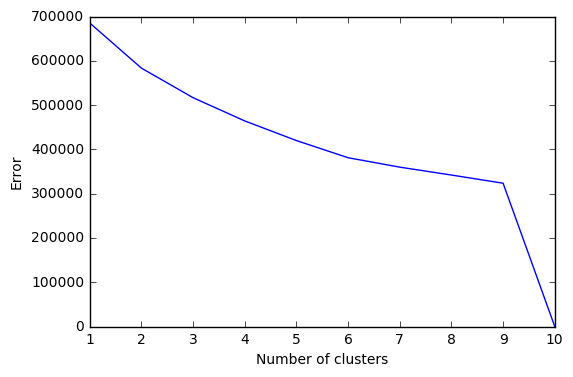

In [30]:
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
dummy = plt.ylabel('Error')

In [31]:
kmeans = KMeans(init='k-means++', n_clusters=9, n_init=10)
kmeans.fit_predict(lstKmeans)
Klabels = kmeans.labels_
Kcentroids = kmeans.cluster_centers_

In [32]:
Kcentroids

array([[ 4.06047539,  1.82320151,  2.67690366,  2.38073202,  2.98496003],
       [ 4.11126285,  3.66508676,  2.15994537,  4.50602506,  3.85459512],
       [ 4.04908783,  4.23368441,  2.82424299,  3.4495016 ,  1.72249389],
       [ 4.08597447,  3.79716097,  4.35014731,  1.8283189 ,  3.26256584],
       [ 4.08410661,  2.3774926 ,  4.13119447,  4.18775913,  2.14195459],
       [ 1.53088392,  3.3972311 ,  3.42353568,  3.42183174,  3.42140575],
       [ 4.09527382,  2.20723931,  4.10662041,  3.89506752,  4.49774944],
       [ 4.10929484,  4.52569342,  4.3725763 ,  4.00365186,  3.96843753],
       [ 4.08373529,  3.89330504,  2.17895041,  2.31323558,  4.21879221]])

In [36]:
Distance = np.zeros(len(Kcentroids))
for x in range(len(Kcentroids)):
    center = Kcentroids[x]
    d = 0
    for i in range(len(user)):
        d += math.pow((user[i]-center[i]),2)
    Distance[x] = math.sqrt(d)

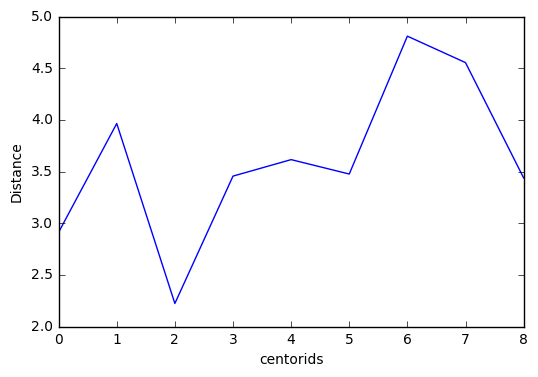

In [39]:
plt.plot(range(0,len(Distance)),Distance[0:])
plt.xlabel('centorids')
dummy = plt.ylabel('Distance')

In [ ]:
##we can see clearly that, cluster 2 has the least distance to the user
##Which means they have similar character or property
##Therefore, we can assign user to cluster 2

In [44]:
companies = []
for index,row in df.iterrows():
    if Klabels[index] == 2:
        company = row['Company']
        rating = row['Rating']
        balance = row['Work/Life Balance']
        benefit = row['Benefit']
        security = row['Security']
        culture = row['Culture']
        
        tmp = [company,rating,balance,benefit,security,culture]
        companies.append(tmp)

In [49]:
##KNN

##Created A Heap of Size K
heap = []
for i in range(K):
    heap.append([sys.maxsize,""])
##print(heap)
start_time = time.time()
for item in companies:
    lst = [item[1],item[2],item[3],item[4],item[5]]
    sums = 0
    for i in range(len(lst)):
        sums += math.pow(user[i]-lst[i],2)
    dist = math.sqrt(sums)
    
    if dist < heap[K-1][0]:        ## means it's closer than the last company in heap
        heap[K-1] = [dist,item[0]]
        heap = sorted(heap,key=lambda x: (x[0],x[1]))
print("Done!!!--- %s seconds ---" % (time.time() - start_time))

Done!!!--- 0.05646395683288574 seconds ---


In [61]:
dic = {}
for i in range(K):
    print(heap[i][1])

Ameriprise-Financial
Arthur J Gallagher & Co
BAE-Systems
Beacon-Health-Options
Blue-Cross-Blue-Shield-of-Massachusetts
Brigham---Women-s-Hospital-BWH-
Dunkin--Brands
Enterprise-Holdings
Enterprise-Holdings
Follett-Corporation
Gap
ICF
Intel
KeyBank
Medtronic
Medtronic
Raytheon
State-Street
TeleTech
UniFirst
AMERICAN-CANCER-SOCIETY
Advanced-Micro-Devices--Inc-
Advanced-Micro-Devices--Inc-
Advanced-Micro-Devices--Inc-
Advanced-Micro-Devices--Inc-


In [ ]:
##Then this will recomment the one repeats the most.